##The dataset contains medicine in stock, sales for 10+ cities in india for different stores along with year, month, day value.
 The task is to forecast sales for 31 days after the last month data present in trainig dataset for different stores in different cities present in test dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Load datasets**

In [ ]:
train_csv = '/content/drive/MyDrive/Drug_sales/train_data.csv' 
test_csv = '/content/drive/MyDrive/Drug_sales/test_data.csv'

In [ ]:
import pandas as pd
import datetime
from sklearn.metrics import mean_squared_error

print('Loading data...')
# load or create your dataset
df = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)

Loading data...


#**Declare other time parameters and create new parameters/features.**

In [ ]:
## I created datetime object to play with frequency. However it is not needed here. Hence commented.
date_time = pd.to_datetime(df[['year','month','day']])
df['Date'] = date_time
#discount_data['date'] = pd.to_datetime(discount_data['date'])
df['day_of_week'] = df['Date'].dt.weekday
#df['week_of_year'] = df['Date'].dt.isocalendar().week
df['day_of_year'] = df['Date'].dt.dayofyear

In [ ]:
df['year'] = (df['year']-2014)
df['dayper_medicine'] = 1/(df['day']/df['medicine'])
df['monthper_medicine'] = 1/(df['month']/df['medicine'])
df['weekday_permedicine'] = 1/(df['day_of_week']/df['medicine'])
df['day_of_year_permedicine'] = 1/(df['day_of_year']/df['medicine'])
#df['city_per_medicine'] = 1/(df['city']/df['medicine'])

In [ ]:
df_test['Date'] = date_time
#discount_data['date'] = pd.to_datetime(discount_data['date'])
df_test['day_of_week'] = df_test['Date'].dt.weekday
#df_test['week_of_year'] = df_test['Date'].dt.isocalendar().week
df_test['day_of_year'] = df_test['Date'].dt.dayofyear
df_test['year'] = (df_test['year']-2014)

In [ ]:
df_test['dayper_medicine'] = 1/(df_test['day']/df_test['medicine'])
df_test['monthper_medicine'] = 1/(df_test['month']/df_test['medicine'])
df_test['weekday_permedicine'] = 1/(df_test['day_of_week']/df_test['medicine'])
df_test['day_of_year_permedicine'] = 1/(df_test['day_of_year']/df_test['medicine'])
#df_test['city_per_medicine'] = 1/(df_test['city']/df_test['medicine'])

In [ ]:
df['derived'] = df['year'] * df['day'] *df['month']*df['city']/df['medicine']
df_test['derived'] = df_test['year'] * df_test['day'] *df_test['month']*df_test['city']/df_test['medicine']

In [ ]:
df['derived1'] = df['medicine'] / df['city'] / df['day']
df_test['derived1'] = df_test['medicine'] / df_test['city'] / df_test['day']

In [ ]:
df['derived2'] = df['medicine'] / df['city'] / df['day_of_year']
df_test['derived2'] = df_test['medicine'] / df_test['city'] / df_test['day_of_year']

In [ ]:
import matplotlib.pyplot as plt
# load dataset
df_values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5,6,7]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(df_values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [ ]:
corr_coefs = df.corr()
print("--------Wholesome Correlation matrix---------")
print(corr_coefs)

In [ ]:
df.describe()

In [ ]:
df = df.dropna(axis=0)
df.describe()

,year,month,day,city,medicine,sales,day_of_week,day_of_year,dayper_medicine,monthper_medicine,weekday_permedicine,day_of_year_permedicine,derived,derived1,derived2
count,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07
mean,2.510319e+00,6.220520e+00,1.572557e+01,5.488639e+00,1.169635e+03,5.166032e+01,2.965776e+00,1.739345e+02,1.519665e+02,3.158610e+02,inf,1.906766e+01,4.594041e+00,4.427838e+01,5.563098e+00
std,1.023379e+00,3.449989e+00,8.789664e+00,2.849396e+00,8.016848e+02,1.100297e+02,1.994729e+00,1.054039e+02,2.806090e+02,4.252030e+02,NaN,6.049095e+01,5.084416e+01,1.167807e+02,2.418246e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.948000e+03,0.000000e+00,2.000000e+00,3.225806e-02,8.333333e-02,1.666667e-01,2.732240e-03,1.384083e-03,3.225806e-03,2.732240e-04
25%,2.000000e+00,3.000000e+00,8.000000e+00,3.000000e+00,5.110000e+02,1.200000e+01,1.000000e+00,8.300000e+01,3.268182e+01,8.408333e+01,1.730000e+02,3.015228e+00,2.724014e-01,6.073892e+00,5.606242e-01
50%,3.000000e+00,6.000000e+00,1.600000e+01,5.000000e+00,1.034000e+03,2.800000e+01,3.000000e+00,1.650000e+02,7.076923e+01,1.795000e+02,3.895000e+02,6.498551e+00,7.934835e-01,1.462500e+01,1.348148e+00
75%,3.000000e+00,9.000000e+00,2.300000e+01,8.000000e+00,1.718000e+03,5.600000e+01,5.000000e+00,2.660000e+02,1.440000e+02,3.486667e+02,9.950000e+02,1.358824e+01,2.109091e+00,3.760714e+01,3.603448e+00
max,4.000000e+00,1.200000e+01,3.100000e+01,1.000000e+01,3.389000e+03,8.299200e+04,6.000000e+00,3.660000e+02,3.359000e+03,3.225000e+03,inf,1.603000e+03,1.116000e+04,3.356000e+03,1.599500e+03


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Text(0, 0.5, 'sales')

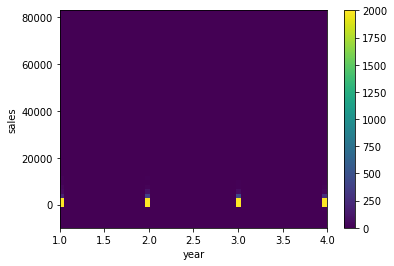

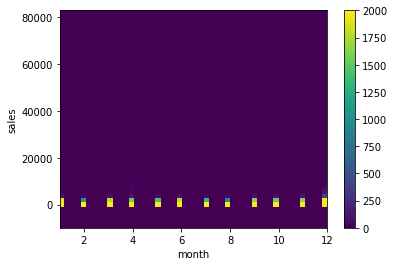

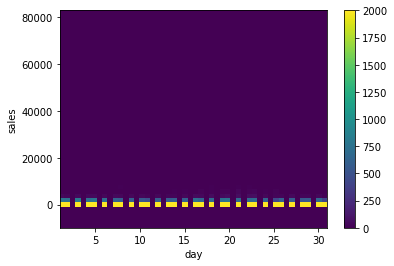

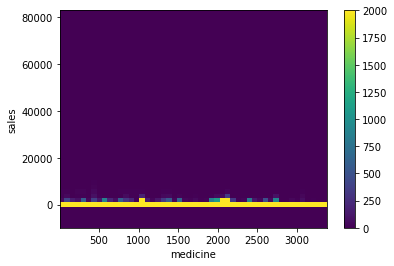

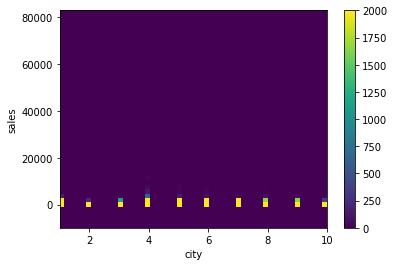

In [ ]:
import matplotlib.pyplot as plt
plt.hist2d(df['year'], df['sales'], bins=(50, 50), vmax=2000)
plt.colorbar()
plt.xlabel('year')
plt.ylabel('sales')

plt.figure()
plt.hist2d(df['month'], df['sales'], bins=(50, 50), vmax=2000)
plt.colorbar()
plt.xlabel('month')
plt.ylabel('sales')

plt.figure()
plt.hist2d(df['day'], df['sales'], bins=(50, 50), vmax=2000)
plt.colorbar()
plt.xlabel('day')
plt.ylabel('sales')

plt.figure()
plt.hist2d(df['medicine'], df['sales'], bins=(50, 50), vmax=2000)
plt.colorbar()
plt.xlabel('medicine')
plt.ylabel('sales')

plt.figure()
plt.hist2d(df['city'], df['sales'], bins=(50, 50), vmax=2000)
plt.colorbar()
plt.xlabel('city')
plt.ylabel('sales')

In [ ]:
df.pop('weekday_permedicine')

0             0.25
1             0.50
2             0.75
3             1.00
4             1.25
             ...  
22624340    611.20
22624341    632.60
22624342    632.80
22624343    631.40
22624344    633.00
Name: weekday_permedicine, Length: 22624345, dtype: float64

In [ ]:
df_test.pop('weekday_permedicine')

0         323.000000
1           0.250000
2           0.500000
3           0.750000
4           1.000000
             ...    
773530    527.166667
773531    527.333333
773532    526.166667
773533    527.500000
773534    509.500000
Name: weekday_permedicine, Length: 773535, dtype: float64

In [ ]:
df.pop('Date')
df_test.pop('Date')

0        2015-01-02
1        2015-01-02
2        2015-01-02
3        2015-01-02
4        2015-01-02
            ...    
773530   2015-03-08
773531   2015-03-08
773532   2015-03-08
773533   2015-03-08
773534   2015-03-08
Name: Date, Length: 773535, dtype: datetime64[ns]

In [ ]:
df.pop('day')
df.pop('month')
df.pop('year')
df_test.pop('day')
df_test.pop('month')
df_test.pop('year')

0         4
1         4
2         4
3         4
4         4
         ..
773530    4
773531    4
773532    4
773533    4
773534    4
Name: year, Length: 773535, dtype: int64

In [ ]:
df_test.pop('dayper_medicine')
df.pop('dayper_medicine')

0             0.500000
1             1.000000
2             1.500000
3             2.000000
4             2.500000
               ...    
22624340    101.866667
22624341    105.433333
22624342    105.466667
22624343    105.233333
22624344    105.500000
Name: dayper_medicine, Length: 22624345, dtype: float64

#**Split train dataset for training ML model.**

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
df_train = df[0:int(n*0.75)]
val_df = df[int(n*0.75):int(n*0.95)]
test_df = df[int(n*0.95):]

num_features = df.shape[1]

In [ ]:
y_train = df_train['sales'] 
y_val = val_df['sales']
y_test = test_df['sales']
y_train.head(5)

0     24.0
1    144.0
2     84.0
3     24.0
4      8.0
Name: sales, dtype: float64

In [ ]:

X_train = df_train.drop('sales',axis = 1)
X_val = val_df.drop('sales',axis = 1)
X_test = test_df.drop('sales',axis = 1)

In [ ]:
X_train.tail(5)

,city,medicine,day_of_week,day_of_year,monthper_medicine,day_of_year_permedicine,derived,derived1,derived2
16968253,5,531,3,313,48.272727,1.696486,2.796610,11.800000,0.339297
16968254,5,532,3,313,48.363636,1.699681,2.791353,11.822222,0.339936
16968255,5,533,3,313,48.454545,1.702875,2.786116,11.844444,0.340575
16968256,5,535,3,313,48.636364,1.709265,2.775701,11.888889,0.341853
16968257,5,536,3,313,48.727273,1.712460,2.770522,11.911111,0.342492


In [ ]:
X_test.head(5)

,city,medicine,day_of_week,day_of_year,monthper_medicine,day_of_year_permedicine,derived,derived1,derived2
21493127,5,292,1,135,58.4,2.162963,5.136986,3.893333,0.432593
21493128,5,293,1,135,58.6,2.170370,5.119454,3.906667,0.434074
21493129,5,294,1,135,58.8,2.177778,5.102041,3.920000,0.435556
21493130,5,295,1,135,59.0,2.185185,5.084746,3.933333,0.437037
21493131,5,296,1,135,59.2,2.192593,5.067568,3.946667,0.438519


#Baseline model: Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor(random_state=1)
# Fit Model
DTR_model.fit(X_train, y_train)

# Make validation predictions and calculate mean absolute error
val_predictions = DTR_model.predict(X_val)
# eval
print('Validation rmse of prediction is:', mean_squared_error(val_predictions, y_val) ** 0.5)
# Make validation predictions and calculate mean absolute error
test_predictions = DTR_model.predict(X_test)
# eval
print('Test rmse of prediction is:', mean_squared_error(test_predictions, y_test) ** 0.5)

Validation rmse of prediction is: 146.48848857866437
Test rmse of prediction is: 96.5819845150338


#Improved baseline model by getting the best max-leaf-nodes and applying the model was improved to 88.35

In [ ]:
DTR_model = DecisionTreeRegressor(max_leaf_nodes=50,random_state=1)
# Fit Model
DTR_model.fit(X_train, y_train)

# Make validation predictions and calculate mean absolute error
val_predictions = DTR_model.predict(X_val)
# eval
print('Validation rmse of prediction is:', mean_squared_error(val_predictions, y_val) ** 0.5)
# Make validation predictions and calculate mean absolute error
test_predictions = DTR_model.predict(X_test)
# eval
print('Test rmse of prediction is:', mean_squared_error(test_predictions, y_test) ** 0.5)

Validation rmse of prediction is: 120.53890999783061
Test rmse of prediction is: 88.350056723026


#**After we improved the baseline models, we chose LightGBM model to improve the model even better. Declare the model (light GBM) for this purpose and validate. Metric RMSE was used for accuracy measurement and was used for callback / to stop training the model.**

In [ ]:
import lightgbm as lgb
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
#lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse'},
    'num_leaves': 31,
    'learning_rate': 0.09,
    'feature_fraction': 0.84,
    #'first_metric_only': True,
    'bagging_fraction': 0.85,
    'bagging_freq': 30,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1500,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

Starting training...
[1]	valid_0's rmse: 126.92
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's rmse: 126.29
[3]	valid_0's rmse: 126.166
[4]	valid_0's rmse: 126.057
[5]	valid_0's rmse: 125.6
[6]	valid_0's rmse: 125.165
[7]	valid_0's rmse: 124.822
[8]	valid_0's rmse: 124.553
[9]	valid_0's rmse: 124.517
[10]	valid_0's rmse: 124.291
[11]	valid_0's rmse: 124.077
[12]	valid_0's rmse: 123.857
[13]	valid_0's rmse: 123.672
[14]	valid_0's rmse: 123.623
[15]	valid_0's rmse: 123.564
[16]	valid_0's rmse: 123.528
[17]	valid_0's rmse: 123.378
[18]	valid_0's rmse: 123.232
[19]	valid_0's rmse: 123.129
[20]	valid_0's rmse: 123.116
[21]	valid_0's rmse: 123.09
[22]	valid_0's rmse: 122.956
[23]	valid_0's rmse: 122.863
[24]	valid_0's rmse: 122.816
[25]	valid_0's rmse: 122.795
[26]	valid_0's rmse: 122.751
[27]	valid_0's rmse: 122.737
[28]	valid_0's rmse: 122.637
[29]	valid_0's rmse: 122.585
[30]	valid_0's rmse: 122.529
[31]	valid_0's rmse: 122.459
[32]	valid_0's rmse: 122.449
[33]

As the training time for lightGBM was less than decisiontree and the reduction in RMSE is also consistent, we chose lightGBM model over decisionTree.

#**Use the model to predict the sales for test dataset.**

In [ ]:
ID = df_test['id']
df_test.pop('id')

0              1
1              2
2              3
3              4
4              5
           ...  
773530    773531
773531    773532
773532    773533
773533    773534
773534    773535
Name: id, Length: 773535, dtype: int64

In [ ]:
df_test.head(5)

In [ ]:
print('Starting prediction...')
y_pred1 = gbm.predict(df_test, num_iteration=gbm.best_iteration)
print(y_pred1)

Starting prediction...
[47.19835149 58.27784257 60.63562383 ... 35.00405083 35.00405083
 32.21225639]


In [ ]:
df_test.head(5)

In [ ]:
dict_ofsubmission = {'id':ID,
                     'sales':y_pred1}
submission_df = pd.DataFrame.from_dict(dict_ofsubmission)
submission_df.to_csv('submission_sales.csv')                                                                                                                                                                                                   
submission_df.head()                                                                                                                                                                                                                        

,id,sales
0,1,47.198351
1,2,58.277843
2,3,60.635624
3,4,60.635624
4,5,61.498569
